In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from MonteCarlo import MonteCarlo

In [7]:
data: pd.DataFrame = yf.download(['^NSEI'], period='10d', interval='1h', progress=False)
data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-09-14 09:15:00+05:30,20127.949219,20167.000000,20096.699219,20111.849609,20111.849609,0
2023-09-14 10:15:00+05:30,20113.099609,20123.800781,20064.300781,20097.500000,20097.500000,0
2023-09-14 11:15:00+05:30,20097.000000,20105.900391,20069.250000,20096.199219,20096.199219,0
2023-09-14 12:15:00+05:30,20098.349609,20102.449219,20050.599609,20091.099609,20091.099609,0
2023-09-14 13:15:00+05:30,20091.800781,20107.650391,20044.699219,20067.500000,20067.500000,0
...,...,...,...,...,...,...
2023-09-28 11:15:00+05:30,19659.699219,19668.550781,19620.349609,19629.800781,19629.800781,0
2023-09-28 12:15:00+05:30,19629.699219,19636.650391,19587.099609,19591.400391,19591.400391,0
2023-09-28 13:15:00+05:30,19591.050781,19592.849609,19540.199219,19551.400391,19551.400391,0


In [8]:
forecasts=8
df = data.copy(deep=True).reset_index(drop = True)[:-forecasts]
df_actual = data.copy(deep=True).reset_index(drop = True)

In [20]:
def probs_find(paths: np.ndarray, higher_than: float)->float:
    if higher_than >= 0:
        predicted0 = paths[0,0]
        predicted = paths[-1]
        predList = list(predicted)
        over = [(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0 >= higher_than]
        less = [(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0 < higher_than]
        return (len(over)/(len(over)+len(less)))
    else:
        predicted0 = paths[0,0]
        predicted = paths[-1]
        predList = list(predicted)
        over = [(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0 < higher_than]
        less = [(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0 >= higher_than]
        return (len(over)/(len(over)+len(less)))


In [10]:
paths = MonteCarlo.simulate(df['Adj Close'].values, forecasts=forecasts, simulations=1000000)

# Calculate the mean path
mean_path = np.mean(paths, axis=1)

# Calculate the max path
max_path = np.max(paths, axis=1)

# Calculate the min path
min_path = np.min(paths, axis=1)

In [21]:
probs_find(paths, -0.1)

0.567006

In [22]:
preds = pd.DataFrame(index=range(df.shape[0], df.shape[0] + paths.shape[0]))
preds['MeanPath'] = mean_path
preds['MinPath'] = min_path
preds['MaxPath'] = max_path

In [23]:
preds

,MeanPath,MinPath,MaxPath
62,19709.349609,19709.349609,19709.349609
63,19703.075227,19185.438342,20259.984517
64,19696.699702,19052.974612,20463.179415
65,19690.199169,18896.229972,20430.426225
66,19683.886154,18890.038973,20537.992874
67,19677.533918,18836.972958,20570.781371
68,19671.156994,18823.728843,20612.501617
69,19664.659273,18624.926657,20687.586243


In [24]:
paths.shape

(8, 1000000)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

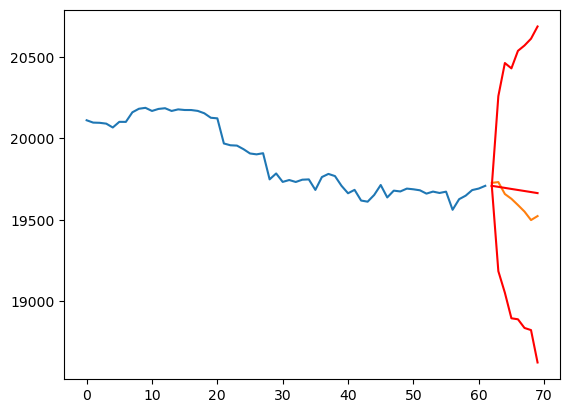

In [25]:
plt.plot(df['Adj Close'][:])
plt.plot(df_actual['Adj Close'][-forecasts:])
plt.plot(preds['MeanPath'], color='red')
plt.plot(preds['MinPath'], color='red')
plt.plot(preds['MaxPath'], color='red')
plt.plot